In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data/transactions_mock_1000_for_participants.csv")

# Basic overview
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes.value_counts())
print("\nMissing values (%):\n", df.isna().mean().sort_values(ascending=False).head(15))
print("Non-null suspicion_determined_datetime:", df['suspicion_determined_datetime'].notna().sum()) # Considered true hit
print("Null suspicion_determined_datetime:", df['suspicion_determined_datetime'].isna().sum()) # Considered false hit


# Convert datetime columns
datetime_cols = ["booking_datetime", "value_date", "kyc_last_completed", 
                 "kyc_due_date", "suspicion_determined_datetime", "str_filed_datetime"]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

df.head()

Shape: (1000, 54)

Data types:
 object     34
bool       14
float64     4
int64       2
Name: count, dtype: int64

Missing values (%):
 str_filed_datetime               0.925
suspicion_determined_datetime    0.925
fx_counterparty                  0.851
fx_quote_ccy                     0.851
fx_base_ccy                      0.851
ordering_institution_bic         0.835
swift_f71_charges                0.835
swift_f70_purpose                0.835
beneficiary_institution_bic      0.835
swift_mt                         0.752
suitability_assessed             0.000
cash_id_verified                 0.000
sanctions_screening              0.000
customer_is_pep                  0.000
kyc_last_completed               0.000
dtype: float64
Non-null suspicion_determined_datetime: 75
Null suspicion_determined_datetime: 925


/var/folders/r5/14k8s1ss4mg5kd7t8s72p6yw0000gn/T/ipykernel_96335/475987579.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
/var/folders/r5/14k8s1ss4mg5kd7t8s72p6yw0000gn/T/ipykernel_96335/475987579.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")


,transaction_id,booking_jurisdiction,regulator,booking_datetime,value_date,amount,currency,channel,product_type,originator_name,...,suitability_assessed,suitability_result,product_has_va_exposure,va_disclosure_provided,cash_id_verified,daily_cash_total_customer,daily_cash_txn_count,sanctions_screening,suspicion_determined_datetime,str_filed_datetime
0,ad66338d-b17f-47fc-a966-1b4395351b41,HK,HKMA/SFC,2024-10-10 10:24:43,2024-10-10,590012.92,HKD,RTGS,fx_conversion,Meredith Krueger,...,True,match,False,True,True,0.0,1,potential,NaT,NaT
1,135cef35-c054-46f0-8d8d-daedb7429de4,SG,MAS,2024-02-23 23:56:23,NaT,1319007.62,GBP,SWIFT,fx_conversion,Jennifer Parker,...,True,match,False,True,True,0.0,1,none,NaT,NaT
2,f037efc0-8438-4af3-9f68-959cd9c9dcb2,CH,FINMA,2024-06-26 23:40:37,NaT,233935.30,GBP,FAST (SG),wire_transfer,Nicole Guerra DVM,...,True,match,False,True,True,0.0,1,potential,NaT,NaT
3,f7589c12-dccb-4ae1-8ad3-324db3316a56,HK,HKMA/SFC,2024-05-03 00:08:29,2024-03-05,1778002.31,GBP,SEPA,fx_conversion,Jeremy Williams,...,True,match,False,True,True,0.0,1,none,NaT,NaT
4,66f1c2c5-6585-40e9-9b9d-4ec10c6fdbae,SG,MAS,2024-12-03 13:58:10,2024-03-12,2479099.40,HKD,RTGS,fx_conversion,Mr. John Turner MD,...,True,match,False,True,True,0.0,1,potential,NaT,NaT


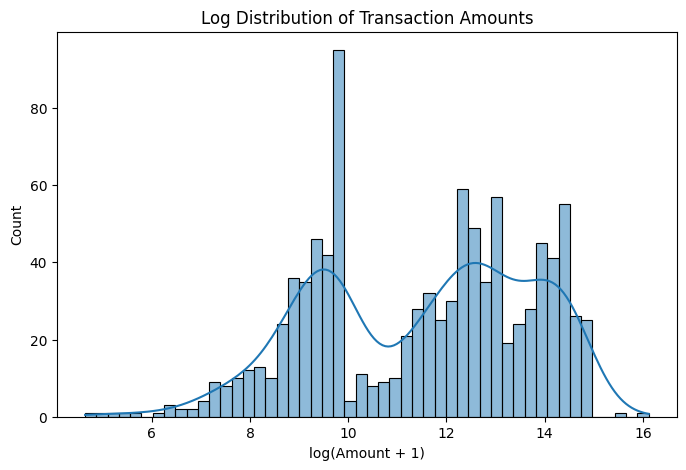

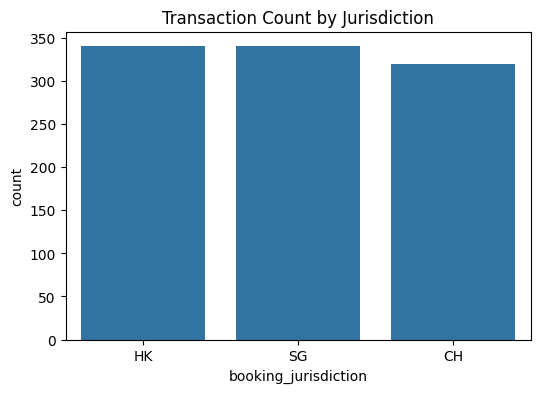

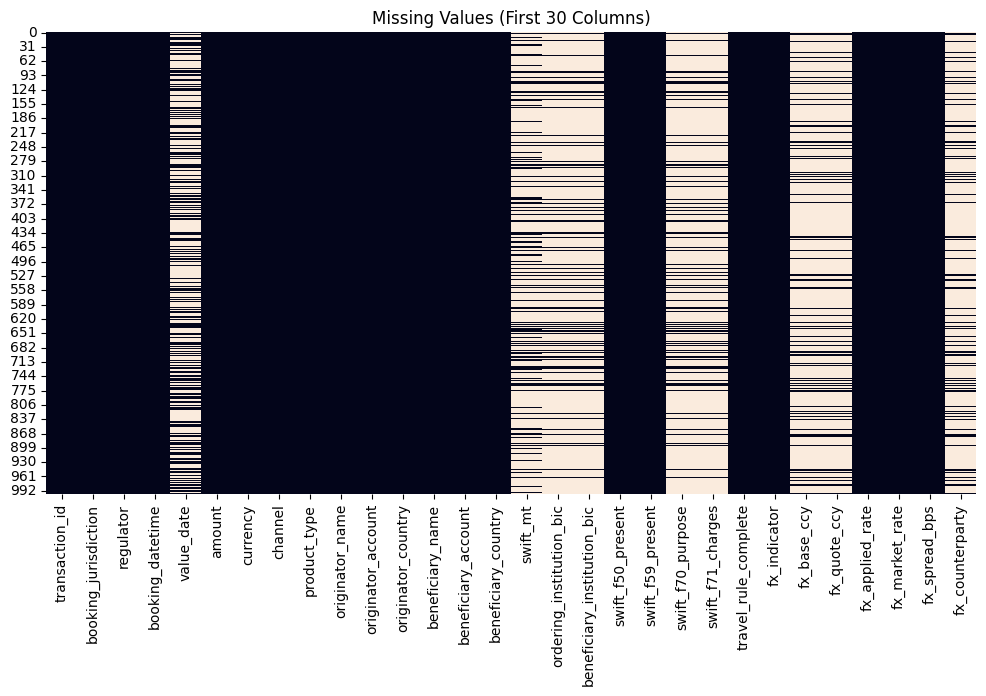

Suspicious transactions (STR filed): 75


In [3]:
# Distribution of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["amount"]), bins=50, kde=True)
plt.title("Log Distribution of Transaction Amounts")
plt.xlabel("log(Amount + 1)")
plt.show()

# Transaction count by jurisdiction
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="booking_jurisdiction")
plt.title("Transaction Count by Jurisdiction")
plt.show()

# Missing value heatmap (top 30 columns)
plt.figure(figsize=(12,6))
sns.heatmap(df.isna().iloc[:, :30], cbar=False)
plt.title("Missing Values (First 30 Columns)")
plt.show()

# Count suspicious cases
print("Suspicious transactions (STR filed):", df["str_filed_datetime"].notna().sum())